**MILEAGE PREDICTION**

**Import library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [2]:
data=pd.read_csv("/content/drive/MyDrive/MPG.csv")

**Describe Data**

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [7]:
data.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [8]:
data['horsepower']=data['horsepower'].fillna(data['horsepower'].median())

In [9]:
data.shape

(398, 9)

In [10]:
data.corr()

<ipython-input-10-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000


**Data Visualization**

<Axes: xlabel='displacement', ylabel='mpg'>

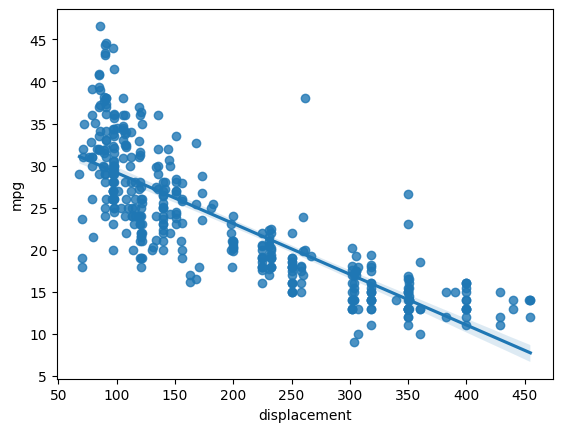

In [11]:
sns.regplot(x= "displacement", y= "mpg", data=data)

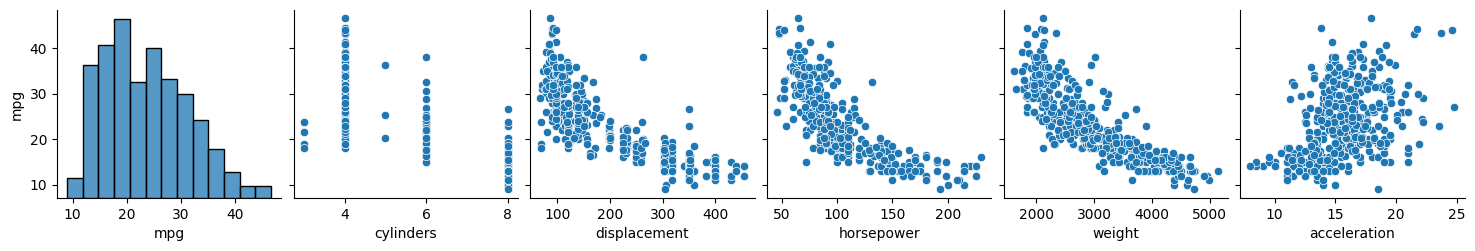

In [12]:
sns.pairplot(data, x_vars=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration'], y_vars=['mpg'])

**Data Preprocessing**

In [13]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

**Define Target Variable (y) and Feature Variables (X)**

In [14]:
y=data['mpg']
x=data[['cylinders', 'displacement', 'horsepower', 'weight','acceleration']]

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
ss= StandardScaler()

In [17]:
x=ss.fit_transform(x)

In [18]:
x

array([[ 1.49819126,  1.0906037 ,  0.67311762,  0.63086987, -1.29549834],
       [ 1.49819126,  1.5035143 ,  1.58995818,  0.85433297, -1.47703779],
       [ 1.49819126,  1.19623199,  1.19702651,  0.55047045, -1.65857724],
       ...,
       [-0.85632057, -0.56103873, -0.53187283, -0.79858454, -1.4407299 ],
       [-0.85632057, -0.70507731, -0.66285006, -0.40841088,  1.10082237],
       [-0.85632057, -0.71467988, -0.58426372, -0.29608816,  1.39128549]])

**Train Test Split**

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=2529)

In [20]:
x_train

array([[ 0.32093534,  0.62007766,  0.41116317,  0.5197295 , -0.16995376],
       [ 0.32093534,  0.54325708, -0.42709106,  0.19931416, -0.3878011 ],
       [-0.85632057, -0.80110303, -0.4532865 , -0.35284069,  0.70143559],
       ...,
       [ 0.32093534,  0.30319277, -0.37470017,  0.48544151,  1.13713026],
       [-0.85632057, -0.7434876 , -0.37470017, -1.00194778, -0.56934055],
       [-0.85632057, -0.9163339 , -1.02958628, -0.69808526,  1.86328806]])

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((278, 5), (120, 5), (278,), (120,))

**Modeling**

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr= LinearRegression()

In [24]:
lr.fit(x_train,y_train)

LinearRegression()

**Model Evaluation**

In [25]:
y_pred=lr.predict(x_test)

In [26]:
y_pred

array([15.28565915, 30.65282627, 18.91027733, 23.87675135, 32.3963273 ,
       29.60557203, 25.29223637, 12.83813677,  9.54835511, 28.99073943,
       30.82340759, 20.81612072, 31.66624884, 14.70244808, 20.57934337,
       14.85864948, 24.24766331, 31.97632673, 14.22687344, 11.28306544,
       18.12798731, 30.17443638, 27.26248216, 18.40785639, 19.74091184,
       25.87113934, 32.20513392, 30.27032062, 10.20082808, 26.01360421,
        8.84263444, 27.10948421, 30.91643795, 21.43702673, 17.31820649,
       21.14368965,  9.16785562, 22.85109799, 30.9272857 , 33.29162246,
       26.37594186, 31.05254073, 27.78584603, 18.04566367, 22.27297723,
       25.26771292, 20.6550112 , 29.65953839, 23.58116938, 24.73131556,
       27.80947679, 12.72527179, 23.14079133, 32.44469797, 19.31497647,
       13.56057796, 30.95881439, 27.16873467, 21.40090604, 30.09119178,
       23.25180695, 30.81091076, 23.48234587,  8.91242754, 31.28904005,
       19.96455734, 27.77028055, 21.68785569, 11.68860767, 28.46

**Prediction**

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [28]:
mean_squared_error(y_test, y_pred)

22.096502995515827

In [29]:
mean_absolute_error(y_test, y_pred)

3.499535058176332

In [30]:
r2_score(y_test, y_pred)

0.6647955958402414

**Polynomial regression**

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
poly=PolynomialFeatures()

In [33]:
x_train2=poly.fit_transform(x_train)

In [34]:
x_test2=poly.fit_transform(x_test)

In [35]:
lr.fit(x_train2,y_train)

LinearRegression()

In [36]:
y_pred_poly=lr.predict(x_test2)

In [37]:
y_pred_poly

array([15.62677592, 32.53161298, 19.99828364, 22.80788174, 34.1476927 ,
       29.05816914, 21.10944535, 13.75045422, 13.02448216, 27.64563466,
       31.57315869, 19.28455453, 33.76052673, 14.26502429, 19.05225522,
       15.01891272, 22.66743144, 34.41586058, 14.80640169, 12.61696749,
       17.18555132, 32.40485617, 25.65379001, 16.46730335, 17.95614045,
       22.65308987, 32.17769279, 32.57818949, 12.83576464, 23.99621079,
       12.6897221 , 28.11368266, 32.8302195 , 18.16068759,  2.82313009,
       21.17546155, 14.44309396, 18.90553446, 32.19823666, 36.320892  ,
       18.52125424, 32.71001377, 26.80453747, 13.20274542, 20.05079248,
       24.57007527, 19.55482435, 30.38343021, 19.45690367, 24.34607203,
       27.51460563, 13.72603239, 18.80447427, 34.99602416, 18.15587709,
       15.43479116, 31.93529967, 26.3503745 , 19.22029346, 31.92436537,
       22.62731137, 33.25669923, 16.04574676, 11.2503436 , 34.82290436,
       18.13753859, 26.11477229, 19.45650889, 13.61682414, 27.86

In [38]:
mean_squared_error(y_test, y_pred_poly)

22.378875673335394

In [39]:
mean_absolute_error(y_test, y_pred_poly)

3.0956022290608036

In [40]:
r2_score(y_test, y_pred_poly)

0.6605119965196289

**Explanation**

In this i have predicted mileage of cars by various factors and predicted mileage using linear regression
